In [2]:
%matplotlib ipympl
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from matplotlib.font_manager import FontProperties
import os

In [3]:
font_path = 'C:\\Windows\\Fonts\\simsun.ttc'  # 宋體
font_prop = FontProperties(fname=font_path)

graph = 'show'   # 'show' or 'save'

In [4]:
def plot_ppg(waveform, feature, Name, i, graph, hands):
    x = np.linspace(0, len(waveform), len(waveform))
    plt.figure(figsize=(5, 3))
    plt.plot(waveform, label='PPG')
    plt.plot(x[feature], waveform[feature], 'r.', label='peak')
    plt.title(f'{Name} PPG signal {i} {hands}', fontproperties=font_prop)
    plt.legend()
    plt.grid(True)
    if graph == 'show':
        plt.show()

In [28]:
def calculate_PPG(waveform, feature, Name, i, graph, hands):
    peak,B10 = find_peaks(waveform, height=0.3, distance=500)
    B1 = peak[1]
    B10 = B10['peak_heights'][1]
    print(B1, B10)
    B2 = (waveform[feature[5]] + waveform[feature[11]]) / 2
    valley,_ = find_peaks(-waveform, height=-0.3, distance=500)
    #plot_ppg(waveform, valley, Name, i, graph, hands)
    B3 = valley[1] - valley[0]
    y_section = np.abs(waveform[valley[0]:valley[1]+1])
    B5 = np.trapz(y_section, dx=1)
    B6 = peak[1] - peak[0]
    B7 = valley[-1] - peak[-1]
    
    calculate_feature = [B1, B2, B3, B5, B6, B7, B10]
    print(f"B1(Systolic peak): {B1}, B1.5(Valley): {valley}, B2(Diastolic peak y): {B2}, B3(Cardiac Cycle): {B3}, B5(Cycle Area): {B5}, B6(SSI): {B6}, B7(Peak to Valley): {B7}, B10(Systolic peak y): {B10}")
    plot_ppg(waveform, B1, Name, i, graph, hands)

自動
Features for Normal1, 1th Left d2:
[24 115 210 270 356 453 1104 1198 1288 1349 1436 1532]
1338 0.418646671920121
B1(Systolic peak): 1338, B1.5(Valley): [   3 1082 1997], B2(Diastolic peak y): 0.4111830341535755, B3(Cardiac Cycle): 1079, B5(Cycle Area): 410.54635931992203, B6(SSI): 1055, B7(Peak to Valley): 659, B10(Systolic peak y): 0.418646671920121


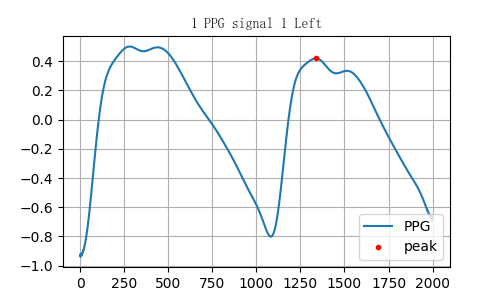

In [29]:
import pandas as pd

def print_features(Name, i, hand, csv_path):
    # Read the CSV file
    data = pd.read_csv(csv_path, header=None)

    # Construct the key from Name, i, and hand to match the first column
    key = f"Normal{Name}, {i}th {hand} d2"

    # Search for the matching row in the first column
    matching_row = data[data[0] == key]

    if not matching_row.empty:
        print(f"Features for {key}:")
        print(matching_row.iloc[0, 1:].values)  # Print feature values (ignoring the first column)
        return matching_row.iloc[0, 1:].values.tolist()
    else:
        print(f"No matching features found for {key}")
        return None
    

# Example usage
csv_path = "F:\\All data\\Normal_Signal\\features.csv"


Name = 1
i = 1
hands = 0


if hands == 0:
    hands = 'Left'
else:
    hands = 'Right'


file = f'F:\\All data\\Normal_Signal\\Normal{Name}, {i}th {hands}.npy'
file2 = f'F:\\All data\\Normal_Signal\\bad signal\\Normal{Name}, {i}th {hands}.npy'
# 若找不到檔案，換另一個位址
if os.path.isfile(file):
    print("自動")
    data = np.load(file)
elif os.path.isfile(file2):
    print("手動")
    data = np.load(file2)
else:
    print("找不到檔案")

feature = print_features(Name, i, hands, csv_path)
if feature is not None:
    #plot_ppg(data, feature, Name, i, graph, hands)
    calculate_PPG(data, feature, Name, i, graph, hands)
    

In [328]:
def plot_d1(derivative, Name, i, Feature):
    
    x = np.linspace(0, len(derivative), len(derivative))
    plt.figure()
    plt.plot(derivative)
    plt.plot(x[Feature], derivative[Feature], '*', label='Peak')
    plt.title(f'{Name}, {i + 1}th Left_Right',fontproperties=font_prop)
    plt.legend()
    plt.grid()
    plt.show()

In [329]:
def calculate_d1(waveform, Name, i, graph, hands):
    
    d1_peaks, B8 = find_peaks(waveform, height=0, distance=800)

    B4 = d1_peaks[1] - d1_peaks[0]
    B8 = B8['peak_heights']

    print(f"B4(1st cycle): {B4}, B8(1st peak): {B8}")


    if graph == 'show':
        plot_d1(waveform, Name, i, d1_peaks)

找不到檔案
1
B4(1st cycle): 984, B8(1st peak): [0.65670138 0.77008288]


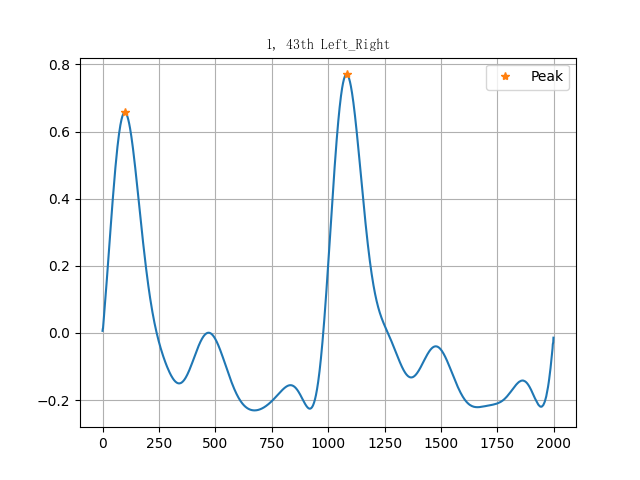

No such comm: 810227639b5643aaa4dfeb0a90e73fda


In [330]:
#!d1
Name = 1
i = 42
hands = 0


if hands == 0:
    hands = 'left'
else:
    hands = 'right'

file = f'F:\\All data\\Normal_Signal\\Normal{Name}, {i}th {hands} d1.npy'
file2 = f'F:\\All data\\Normal_Signal\\bad signal\\Normal{Name}, {i}th {hands} d1.npy'
# 若找不到檔案，換另一個位址
if os.path.isfile(file):
    print("自動")
    Name = file.split('\\')[3].split(',')[0]
    i = int(file.split('\\')[3].split(',')[1].split(' ')[1][:-2])
    hand = file.split('\\')[3].split(',')[1].split(' ')[2]
    data = np.load(file)
elif os.path.isfile(file2):
    print("手動")
    Name = file.split('\\')[3].split(',')
    i = int(file.split('\\')[3].split(',')[1].split(' ')[1][:-2])
    hand = file.split('\\')[3].split(',')[1].split(' ')[2]
    data = np.load(file2)
else:
    print("找不到檔案")
print(Name)

d3 = np.gradient(data, axis=0) * 50
d3 = np.where(d3 > 0.1, 0.5, -0.5)

calculate_d1(data, Name, i,'show', hands)

In [3]:
def plot_d2(waveform, derivative, Name, i, Feature, hands, locate):
    
    x = np.linspace(0, len(derivative), len(derivative))
    plt.figure()
    
    plt.plot(waveform)
    plt.plot(derivative[5:1995])
    plt.plot(x[Feature], waveform[Feature], '*', label='Peak')
    plt.title(f'{Name}, {i}th {hands}',fontproperties=font_prop)
    plt.legend()
    plt.grid()
    if graph == 'show':
        plt.show()

In [4]:
def calculate_d2(waveform, derivative, Name, i, graph, hands):
    zero_crossings = np.where(np.diff(np.sign(derivative)))[0]


    if graph =='show':
        plot_d2(waveform,derivative, Name, i, zero_crossings, hands, "F:\\TDPPG")
        print(zero_crossings)

In [6]:
#!d2
Name = 1
i = 42
hands = 0


if hands == 0:
    hands = 'left'
else:
    hands = 'right'

file = f'F:\\All data\\Normal_Signal\\Normal{Name}, {i}th {hands} d2.npy'
file2 = f'F:\\All data\\Normal_Signal\\bad signal\\Normal{Name}, {i}th {hands} d2.npy'
# 若找不到檔案，換另一個位址
if os.path.isfile(file):
    print("自動")
    Name = file.split('\\')[3].split(',')[0]
    i = int(file.split('\\')[3].split(',')[1].split(' ')[1][:-2])
    hand = file.split('\\')[3].split(',')[1].split(' ')[2]
    data = np.load(file)
elif os.path.isfile(file2):
    print("手動")
    Name = file.split('\\')[3].split(',')
    i = int(file.split('\\')[3].split(',')[1].split(' ')[1][:-2])
    hand = file.split('\\')[3].split(',')[1].split(' ')[2]
    data = np.load(file2)
else:
    print("找不到檔案")
print(Name)

d3 = np.gradient(data, axis=0) * 50
d3 = np.where(d3 > 0.1, 0.5, -0.5)

calculate_d2(data, d3, Name, i, 'show', hand)


找不到檔案
1


NameError: name 'data' is not defined